In [1]:
import pandas as pd
import numpy as np
from math import sqrt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MaxAbsScaler, MinMaxScaler, StandardScaler
from figsave import save_fig

## Traindata 

In [2]:
X_train = pd.read_csv('feature_all_MDK2.csv').set_index('pktnum').reset_index(drop = True)
X_train.columns

Index(['ETS', 'ETp', 'Fs1', 'Fs2', 'GQ', 'Isoll', 'MET', 'Pmax', 'Pv', 'Qdot',
       'Qsgf', 'R10', 'R90', 'dF', 'dP', 'dR', 'dt', 'ser'],
      dtype='object')

In [3]:
y_train = pd.read_csv('Schweissdata_d_MDK2_c.dat', skiprows=12,sep='\t',header = None).iloc[:,:-1]
# y_train = pd.read_csv('Schweissdata_d_MDK2.dat', skiprows=12,sep='\t',header = None).iloc[:,:-1]
y_train.columns = ['pktnum','dp1','dp2','dw','I','delta_I','zustand','bruch']
# y_train.columns = ['pktnum','dp1','dp2','dw','I','delta_I','zustand']
y_train = y_train.drop(columns = 'delta_I').set_index('pktnum').sort_index()
y_train = y_train.zustand
y_train.values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2,
       2, 2], dtype=int64)

In [4]:
X_train.ETS.loc[X_train.ETS<0] = 0
X_train.ETp.loc[X_train.ETp<0] = 0
X_train.MET.loc[X_train.MET<0] = 0
X_train.shape

(68, 18)

In [5]:
scaler = MaxAbsScaler()
X_train_nor = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index = X_train.index).drop(columns = ['ETS','dR'])
# X_train_nor = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index = X_train.index).drop(columns = ['dR'])
X_train_nor.tail(5)

,ETp,Fs1,Fs2,GQ,Isoll,MET,Pmax,Pv,Qdot,Qsgf,R10,R90,dF,dP,dt,ser
63,0.341194,0.681556,0.115170,0.981914,0.961538,0.336843,0.947634,0.599897,0.985903,0.959766,0.333100,0.297124,0.443236,0.742136,0.552780,0.314670
64,0.823200,0.759015,0.845540,0.952184,0.961538,0.817284,0.959741,0.733840,0.956909,0.875080,0.332976,0.286358,0.655263,0.919073,0.561050,0.344036
65,0.949514,0.973037,0.701364,0.988641,1.000000,0.912985,0.995805,0.782485,0.995033,0.944416,0.325899,0.273534,0.774763,0.986908,0.570611,0.340629
66,1.000000,1.000000,1.000000,0.997024,1.000000,1.000000,1.000000,0.794428,0.991505,0.950032,0.318466,0.272292,0.824220,1.000000,0.468212,0.344103
67,0.421101,0.705494,0.619090,1.000000,1.000000,0.464302,0.997589,0.633148,1.000000,0.969175,0.318609,0.292881,1.000000,0.794535,0.517937,0.316392


## Testdata

In [12]:
X_test = pd.read_csv('test_data_feature_all.csv').set_index('pktnum').reset_index(drop = True)
X_test.shape

(31, 18)

In [13]:
y_test = pd.read_excel('ExperimentB_data.xlsx', skiprows=4)
y_test = y_test.zustand
y_test.values

array([-1,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  2,  2,  2,  2, -1,  2,  2,  2,  2],
      dtype=int64)

In [14]:
X_test.ETS.loc[X_test.ETS<0] = 0
X_test.ETp.loc[X_test.ETp<0] = 0
X_test.MET.loc[X_test.MET<0] = 0
X_test.head()

,ETS,ETp,Fs1,Fs2,GQ,Isoll,MET,Pmax,Pv,Qdot,Qsgf,R10,R90,dF,dP,dR,dt,ser
0,0.000000,0.076727,0.838455,0.121584,4.632695,5.6,0.131045,8.233108,3.416213,7.484156,154.026455,0.216647,0.229680,0.278476,0.888147,0.0,-0.007898,1.819688
1,0.008275,0.089259,0.695394,0.000000,4.447366,5.6,0.089259,7.580432,1.790828,7.261108,150.144917,0.214027,0.225204,0.250516,0.423334,0.0,-0.004638,1.790502
2,0.000000,0.063439,0.904660,0.064131,4.464405,5.6,0.069128,7.584841,1.959340,7.290742,151.081286,0.215472,0.226579,0.262795,0.386460,0.0,-0.004562,1.788470
3,0.000000,0.060928,0.656045,0.000000,4.858555,5.6,0.083307,8.266251,2.314415,7.939454,163.387384,0.201772,0.209596,0.250183,0.485518,0.0,-0.004218,1.653259
4,0.000000,0.011757,0.829069,0.101731,4.498752,5.6,0.021864,7.687782,1.917697,7.316015,152.834650,0.213922,0.228852,0.255809,0.366702,0.0,-0.005852,1.780753


In [15]:
X_test['class'] = y_test
X_test = X_test.loc[X_test['class'] != -1].drop(columns = 'class')
X_test.shape

(28, 18)

In [16]:
y_test = y_test.loc[y_test!=-1]
y_test = y_test.reset_index(drop = True)

In [17]:
X_test_nor = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index = X_test.index).drop(columns = ['ETS','dR'])
# X_test_nor = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index = X_test.index).drop(columns = ['dR'])
X_test_nor.tail(5)

,ETp,Fs1,Fs2,GQ,Isoll,MET,Pmax,Pv,Qdot,Qsgf,R10,R90,dF,dP,dt,ser
25,0.468551,1.590878,0.552297,0.853424,0.923077,0.538327,0.897887,0.712438,0.871766,0.835005,0.338039,0.272907,1.142569,0.937468,0.687341,0.298366
27,1.070371,1.081277,0.710339,0.912227,1.000000,0.922860,0.976419,0.915850,0.956565,0.820062,0.329003,0.228029,0.995309,1.254030,0.906499,0.294241
28,0.639590,1.329930,0.402066,0.929003,1.000000,0.681609,0.970545,0.707874,0.966191,0.929609,0.324408,0.258802,1.249250,0.962040,0.838148,0.295783
29,0.509404,1.496462,0.491857,0.938520,1.000000,0.529573,0.979246,0.747753,0.949227,0.915066,0.324412,0.257984,0.948648,1.022918,0.608464,0.285005
30,0.674065,2.175645,0.329402,0.930008,1.000000,0.601992,0.979239,0.724004,0.945962,0.922120,0.326260,0.260742,0.971882,1.006021,0.655854,0.300751


## Alldata 

In [18]:
# X_all = pd.concat([X_train, X_test])
# X_all.shape

In [19]:
# scaler = MaxAbsScaler()
# X_all_nor = pd.DataFrame(scaler.fit_transform(X_all), columns=X_all.columns, index = X_all.index).drop(columns = ['ETS','dR'])
# X_all_nor.head()

In [20]:
# X_train_nor = X_all_nor.iloc[:X_train.shape[0]]
# X_train_nor.tail()

In [21]:
# X_test_nor = X_all_nor.iloc[-X_test.shape[0]:]
# X_test_nor

## Feature selection

In [43]:
# corrmat = MDK2_nor.corr()
# plt.figure(figsize=(14,9))
# sns.heatmap(corrmat, annot=True, cmap="RdYlGn")

In [22]:
from sklearn.decomposition import PCA

In [23]:
p = 0.90
pca = PCA()
pca.fit(X_train_nor)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= p)+1
d

3

In [24]:
pca.explained_variance_ratio_

array([7.57418982e-01, 1.04183419e-01, 7.78579093e-02, 2.95985823e-02,
       1.16006442e-02, 8.19307981e-03, 5.08305186e-03, 2.66164020e-03,
       1.80157773e-03, 6.92897673e-04, 3.57616038e-04, 3.08733988e-04,
       2.05628188e-04, 3.02036658e-05, 4.96623279e-06, 1.06803755e-06])

In [25]:
7.57418982e-01 + 1.04183419e-01 + 7.78579093e-02

0.9394603103000001

In [26]:
len(cumsum)

16

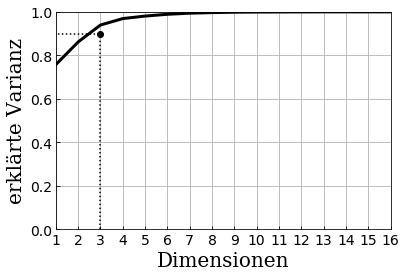

In [27]:
font = {'family': 'serif',
        'size': 20
        }
prop={'family': 'serif', 'size':10}

plt.figure(figsize=(6,4))
plt.plot(np.arange(1,17),cumsum, linewidth=3,color = 'k')
plt.xticks(np.arange(1,17))
plt.axis([1, X_test_nor.shape[1], 0, 1])
plt.xlabel("Dimensionen", fontdict=font)
plt.ylabel("erklärte Varianz", fontdict=font)
plt.tick_params(axis='both', which='major', labelsize=14, direction='in')
plt.plot([d, d], [0, p], "k:")
plt.plot([0, d], [p, p], "k:")
plt.plot(d, p, "ko")
# plt.annotate("Elbow", xy=(4, 0.95), xytext=(7, 0.8),
#              arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)
# save_fig(image_path='C:/DA/Code/pywt/images/MDK2', fig_name='pca',reselution=200)
plt.show()


### Train a Logistic Regression Model (Baseline Model)

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.model_selection import StratifiedKFold,KFold
from sklearn.base import clone

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
seed = 42

In [30]:
def cross_val_user(n_splits, shuffle, random_state, clf,X_train, y_train):
    acc_l = []
    skfolds = StratifiedKFold(n_splits= n_splits, shuffle=shuffle, random_state = random_state)
    for train_index, test_index in skfolds.split(X_train, y_train):
        clone_clf = clone(clf)
        X_train_folds = X_train.values[train_index]
        y_train_folds = y_train.values[train_index]
        X_test_fold = X_train.values[test_index]
        y_test_fold = y_train.values[test_index]
        clone_clf.fit(X_train_folds, y_train_folds)
        y_pred = clone_clf.predict(X_test_fold)
        accuracy = accuracy_score(y_pred, y_test_fold)
        acc_l.append(accuracy)
    return np.mean(acc_l)

In [31]:
clf_lr = LogisticRegression(random_state = seed)      
lr_baseline_model = clf_lr.fit(X_train_nor,y_train)

In [32]:
skfolds = StratifiedKFold(n_splits=4, shuffle=True, random_state = seed)
cross_acc = cross_val_user(n_splits=4, shuffle = True, random_state=seed, clf = clf_lr, X_train = X_train_nor ,y_train = y_train )
cross_pred = cross_val_predict(clf_lr, X_train_nor ,y_train, cv = skfolds) 
print("Model Accuracy Corss val:", np.mean(cross_acc))

Model Accuracy Corss val: 0.9705882352941178


In [33]:
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve, roc_auc_score,auc
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle
from sklearn.preprocessing import label_binarize

In [34]:
def ROC_curve_plot(n_splits, shuffle,random_state, clf,X_train ,y_train):
    skfolds = StratifiedKFold(n_splits=n_splits, shuffle=shuffle, random_state = random_state)
    clone_clf = clone(clf)
    classifier = OneVsRestClassifier(clone_clf)    
    y = label_binarize(y_train, classes=[0, 1, 2])
    n_classes = y.shape[1]
    y_score = cross_val_predict(classifier, X_train, y_train, cv=skfolds, method="decision_function")
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    plt.figure()
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=1.5)

    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle='-', linewidth=1.5)
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC to multi-class')
    plt.legend(loc="lower right")
    plt.show()


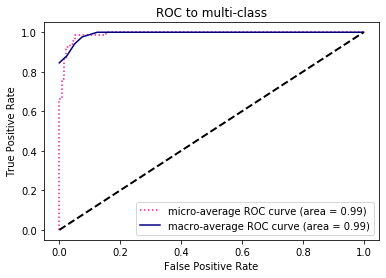

Model Accuracy Cross-Validation: 0.9705882352941178


In [35]:
cross_acc = cross_val_user(n_splits=4, shuffle = True, random_state=seed, clf = clf_lr, X_train = X_train_nor, y_train = y_train )
ROC_curve_plot(n_splits=4, shuffle = True,random_state = seed, clf = clf_lr,X_train= X_train_nor ,y_train = y_train)
print("Model Accuracy Cross-Validation:", cross_acc)

### SFM

In [36]:
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.model_selection import KFold
# Building the RandomForestClassifier model
from sklearn.ensemble import RandomForestClassifier

In [37]:
X_train_nor

,ETp,Fs1,Fs2,GQ,Isoll,MET,Pmax,Pv,Qdot,Qsgf,R10,R90,dF,dP,dt,ser
0,0.088645,0.075743,0.008083,0.239269,0.230769,0.000000,0.211243,0.665421,0.224371,0.273469,0.761907,0.738913,0.089333,0.021133,-0.076071,0.736805
1,0.089258,0.054107,0.011201,0.167648,0.230769,0.008994,0.157239,0.421391,0.154263,0.197746,0.971518,0.965588,0.066344,0.012295,-0.260715,0.962969
2,0.100974,0.064787,0.000000,0.171511,0.230769,0.007391,0.157565,0.659217,0.157937,0.201250,1.000000,1.000000,0.076993,0.012562,-0.249127,1.000000
3,0.189197,0.088130,0.025192,0.221691,0.269231,0.050602,0.194931,0.293999,0.205113,0.248676,0.885584,0.873400,0.091284,0.017543,-0.203891,0.891660
4,0.166371,0.077565,0.000000,0.263184,0.269231,0.023293,0.228919,0.028898,0.245097,0.294265,0.696701,0.682570,0.111388,0.024738,-0.132250,0.693091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,0.341194,0.681556,0.115170,0.981914,0.961538,0.336843,0.947634,0.599897,0.985903,0.959766,0.333100,0.297124,0.443236,0.742136,0.552780,0.314670
64,0.823200,0.759015,0.845540,0.952184,0.961538,0.817284,0.959741,0.733840,0.956909,0.875080,0.332976,0.286358,0.655263,0.919073,0.561050,0.344036
65,0.949514,0.973037,0.701364,0.988641,1.000000,0.912985,0.995805,0.782485,0.995033,0.944416,0.325899,0.273534,0.774763,0.986908,0.570611,0.340629
66,1.000000,1.000000,1.000000,0.997024,1.000000,1.000000,1.000000,0.794428,0.991505,0.950032,0.318466,0.272292,0.824220,1.000000,0.468212,0.344103


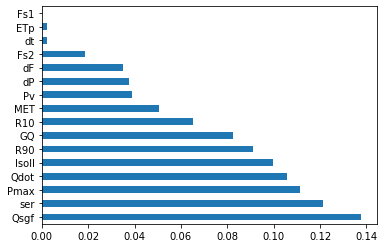

In [38]:
clf_rf = RandomForestClassifier(n_estimators=100, random_state=seed, n_jobs=-1)
clf_rf.fit(X_train_nor, y_train)

feat_importances = pd.Series(clf_rf.feature_importances_, index=X_train_nor.columns)
feat_importances.nlargest(17).plot(kind='barh')
plt.show()

In [39]:
rf_sfm = SelectFromModel(clf_rf)

# Train the selector
rf_sfm = rf_sfm.fit(X_train_nor, y_train)
X_important_train = rf_sfm.transform(X_train_nor)

In [40]:
rf_sfm_feature = X_train_nor.columns.values[rf_sfm.get_support()]
X_important_train = X_train_nor[rf_sfm_feature]
X_important_test = X_test_nor[rf_sfm_feature]

In [41]:
rf_sfm_feature

array(['GQ', 'Isoll', 'Pmax', 'Qdot', 'Qsgf', 'R10', 'R90', 'ser'],
      dtype=object)

In [42]:
clf_rf.fit(X_important_train, y_train)
rf_pred = clf_rf.predict(X_important_test)

In [43]:
rf_pred,y_test.values

(array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
        1, 1, 2, 2, 2, 2], dtype=int64),
 array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
        2, 2, 2, 2, 2, 2], dtype=int64))

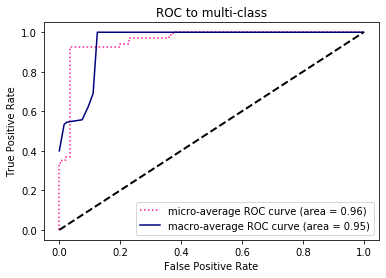

Model Accuracy Cross-Validation: 0.926470588235294


In [44]:
cross_acc = cross_val_user(n_splits=4, shuffle = True, random_state=seed, clf = clf_lr, X_train = X_important_train, y_train = y_train )
ROC_curve_plot(n_splits=4, shuffle = True,random_state = seed, clf = clf_lr,X_train= X_important_train ,y_train = y_train)
print("Model Accuracy Cross-Validation:", cross_acc)

### REF

In [45]:
from sklearn.feature_selection import RFE,RFECV

In [46]:
cv = StratifiedKFold(n_splits=4,shuffle=True,random_state=seed)
rfe_selector = RFECV(clf_rf,step=1,cv = cv,scoring= 'accuracy', n_jobs=-1)
rfe_selector.fit(X_train_nor, y_train)

RFECV(cv=StratifiedKFold(n_splits=4, random_state=42, shuffle=True),
      estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nodes=None, max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=-1,
                                       oob_score=False, random_state=42,
                                       verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=-1, scoring='accuracy', step=1,
      verbose=0)

14 selected features
Optimal number of features : 14


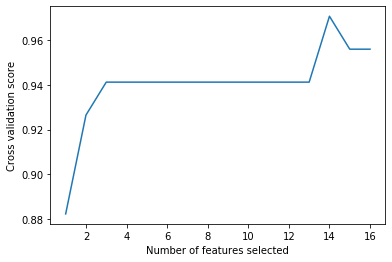

In [47]:
rfe_support = rfe_selector.support_
# rfe_support = rfe_selector.get_support()
rfe_feature = X_train_nor.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')
print("Optimal number of features : %d" % rfe_selector.n_features_)
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(rfe_selector.grid_scores_) + 1), rfe_selector.grid_scores_)
plt.show()

In [48]:
X_ref_train = X_train_nor[rfe_feature]

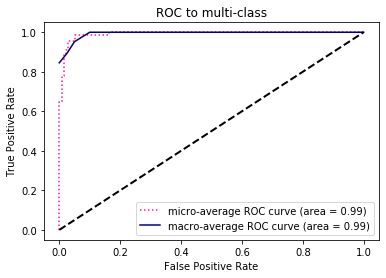

Model Accuracy Cross-Validation: 0.9705882352941178


In [49]:
cross_acc = cross_val_user(n_splits=4, shuffle = True, random_state=seed, clf = clf_lr, X_train = X_ref_train, y_train = y_train)
ROC_curve_plot(n_splits=4, shuffle = True,random_state = seed, clf = clf_lr,X_train= X_ref_train ,y_train = y_train)
print("Model Accuracy Cross-Validation:", cross_acc)

### Forward selection 

In [50]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [51]:
cv = StratifiedKFold(n_splits=4,shuffle=True,random_state=seed)
sfs1 = SFS(clf_rf, 
           k_features=15, 
           forward=True, 
           scoring='accuracy',
           floating=True,
           cv=cv,
           n_jobs=-1,
           verbose=2
          )

sfs1.fit(X_train_nor,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  16 | elapsed:    4.2s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    5.1s finished

[2021-02-11 22:56:26] Features: 1/15 -- score: 0.9411764705882353[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:    1.8s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    3.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.9s finished

[2021-02-11 22:56:31] Features: 2/15 -- score: 1.0[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  14 | elapsed:    1.8s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:    3.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend wit

SequentialFeatureSelector(clone_estimator=True,
                          cv=StratifiedKFold(n_splits=4, random_state=42, shuffle=True),
                          estimator=RandomForestClassifier(bootstrap=True,
                                                           ccp_alpha=0.0,
                                                           class_weight=None,
                                                           criterion='gini',
                                                           max_depth=None,
                                                           max_features='auto',
                                                           max_leaf_nodes=None,
                                                           max_samples=None,
                                                           min_impurity_decrease=0.0,
                                                           min_impurity_split=None,
                                                           min_samples_leaf=1

In [52]:
pd.DataFrame.from_dict(sfs1.get_metric_dict()).T.sort_values('avg_score',ascending=False).head()

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
2,"(2, 4)","[1.0, 1.0, 1.0, 1.0]",1,"(Fs2, Isoll)",0,0,0
3,"(2, 4, 12)","[1.0, 1.0, 1.0, 1.0]",1,"(Fs2, Isoll, dF)",0,0,0
4,"(0, 2, 4, 12)","[1.0, 1.0, 1.0, 1.0]",1,"(ETp, Fs2, Isoll, dF)",0,0,0
5,"(0, 2, 4, 7, 12)","[1.0, 1.0, 1.0, 1.0]",1,"(ETp, Fs2, Isoll, Pv, dF)",0,0,0
6,"(0, 2, 3, 4, 7, 12)","[1.0, 1.0, 1.0, 0.9411764705882353]",0.985294,"(ETp, Fs2, GQ, Isoll, Pv, dF)",0.0408301,0.0254713,0.0147059


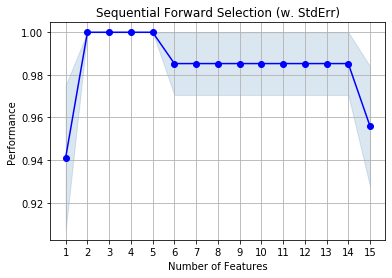

In [53]:
fig = plot_sfs(sfs1.get_metric_dict(), kind='std_err')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [54]:
sfs_feature = pd.DataFrame.from_dict(sfs1.get_metric_dict()).T.sort_values('avg_score',ascending=False).feature_names.iloc[0]
sfs_feature

('Fs2', 'Isoll')

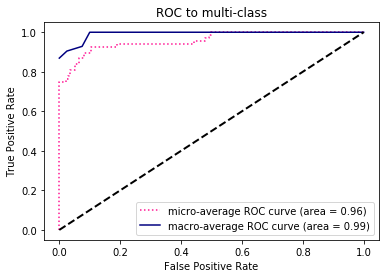

Model Accuracy Cross-Validation: 0.8823529411764706


In [55]:
cross_acc = cross_val_user(n_splits=4, shuffle = True, random_state=seed, clf = clf_lr, X_train = X_train_nor[list(sfs_feature)], y_train = y_train )
ROC_curve_plot(n_splits=4, shuffle = True,random_state = seed, clf = clf_lr,X_train= X_train_nor[list(sfs_feature)] ,y_train = y_train)
print("Model Accuracy Cross-Validation:", cross_acc)

### XGBClassifier selection

Feature Importances :  [1.16648525e-02 4.64663561e-03 3.46581131e-01 5.99956632e-01
 0.00000000e+00 2.85218023e-02 0.00000000e+00 2.24327762e-03
 5.06891403e-04 4.80285817e-04 7.68099446e-04 0.00000000e+00
 3.97589896e-03 0.00000000e+00 6.54549920e-04 0.00000000e+00]


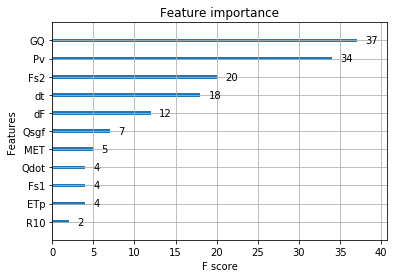

In [56]:
from xgboost import XGBClassifier
from xgboost import plot_importance

# fit model to training data
xgb_model = XGBClassifier(random_state = seed )
xgb_model.fit(X_train_nor, y_train)

print("Feature Importances : ", xgb_model.feature_importances_)

# plot feature importance
plot_importance(xgb_model)
plt.show()

In [57]:
selection = SelectFromModel(xgb_model)
selection.fit(X_train_nor, y_train)

# Transform the train and test features
select_X_train = selection.transform(X_train_nor)

In [58]:
selection_feature = X_train_nor.columns.values[selection.get_support()]
selection_feature

array(['Fs2', 'GQ'], dtype=object)

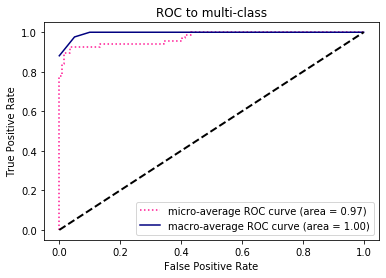

Model Accuracy Cross-Validation: 0.9411764705882353


In [59]:
cross_acc = cross_val_user(n_splits=4, shuffle = True, random_state=seed, clf = clf_lr, X_train = X_train_nor[selection_feature], y_train = y_train )
ROC_curve_plot(n_splits=4, shuffle = True,random_state = seed, clf = clf_lr,X_train= X_train_nor[selection_feature] ,y_train = y_train)
print("Model Accuracy Cross-Validation:", cross_acc)

### Boruta

In [60]:
from boruta import BorutaPy

In [61]:
boruta_selector = BorutaPy(RandomForestClassifier(), n_estimators='auto', verbose=0, random_state=seed)

boruta_selector.fit(np.array(X_train_nor), np.array(y_train))

BorutaPy(alpha=0.05,
         estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                          class_weight=None, criterion='gini',
                                          max_depth=None, max_features='auto',
                                          max_leaf_nodes=None, max_samples=None,
                                          min_impurity_decrease=0.0,
                                          min_impurity_split=None,
                                          min_samples_leaf=1,
                                          min_samples_split=2,
                                          min_weight_fraction_leaf=0.0,
                                          n_estimators=56, n_jobs=None,
                                          oob_score=False,
                                          random_state=RandomState(MT19937) at 0x19886292158,
                                          verbose=0, warm_start=False),
         max_iter=100, n_estimators='

In [62]:
boruta_feature = X_train_nor.columns.values[boruta_selector.support_]
boruta_feature

array(['ETp', 'Fs1', 'Fs2', 'GQ', 'Isoll', 'MET', 'Pmax', 'Pv', 'Qdot',
       'Qsgf', 'R10', 'R90', 'dF', 'dP', 'ser'], dtype=object)

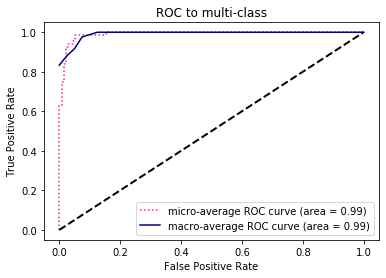

Model Accuracy Cross-Validation: 0.9705882352941178


In [63]:
cross_acc = cross_val_user(n_splits=4, shuffle = True, random_state=seed, clf = clf_lr, X_train = X_train_nor[boruta_feature], y_train = y_train )
ROC_curve_plot(n_splits=4, shuffle = True,random_state = seed, clf = clf_lr,X_train= X_train_nor[boruta_feature] ,y_train = y_train)
print("Model Accuracy Cross-Validation:", cross_acc)

In [64]:
def ROC_curve_plot_multi(n_splits, shuffle,random_state, clf,X_train ,y_train,clf_name,acc):
    skfolds = StratifiedKFold(n_splits=n_splits, shuffle=shuffle, random_state = random_state)
    clone_clf = clone(clf)
    classifier = OneVsRestClassifier(clone_clf)    
    y = label_binarize(y_train, classes=[0, 1, 2])
    n_classes = y.shape[1]
    y_score = cross_val_predict(classifier, X_train, y_train, cv=skfolds, method="decision_function")
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    
    ax.plot(fpr["micro"], tpr["micro"], lw = 2,label = '{:<11} AUROC = {:.5f} Cross-Val-Acc = {:.5f}' .format(clf_name + ':' ,roc_auc["micro"], acc),alpha = 0.5)
    
    return roc_auc["micro"]

In [65]:
# def ROC_curve_plot_(n_splits, random_state, shuffle, clf, X, y, clf_name, acc):
#     skfolds = StratifiedKFold(n_splits=n_splits,random_state=random_state,shuffle=shuffle)
#     clone_clf = clone(clf)
#     y_probas_model = cross_val_predict(clone_clf, X, y, cv=skfolds, method="predict_proba")
#     y_scores_model = y_probas_model[:, 1] 
#     fpr_forest, tpr_forest, thresholds_forest = roc_curve(y,y_scores_model)
#     model_auc = roc_auc_score(y_train, y_scores_model) 
    
#     ax.plot(fpr_forest, tpr_forest, lw = 2,label = '{:<11} AUROC = {:.5f} Cross-Val-Acc = {:.5f}' .format(clf_name + ':' ,model_auc, acc),alpha = 0.5)
    
#     return model_auc

In [66]:
sel_summary = pd.DataFrame()
sel_summary['Feature'] = list(X_train_nor)
sel_summary['SFM'] = rf_sfm.get_support() 
sel_summary['REF'] = rfe_support
sel_summary['XGB'] = selection.get_support()
sel_summary['Boruta'] = boruta_selector.support_
sel_summary['SFS'] = [col in sfs_feature for col in list(X_train_nor)]
sel_summary = sel_summary.set_index('Feature')
sel_summary = sel_summary*1
sel_summary['All'] = [1 for col in list(X_train_nor)]
sel_summary['count'] = sel_summary.sum(axis=1)
sel_summary = sel_summary.reset_index()

In [67]:
sel_summary.sort_values('count',ascending = False)

,Feature,SFM,REF,XGB,Boruta,SFS,All,count
2,Fs2,0,1,1,1,1,1,5
3,GQ,1,1,1,1,0,1,5
4,Isoll,1,1,0,1,1,1,5
6,Pmax,1,1,0,1,0,1,4
8,Qdot,1,1,0,1,0,1,4
9,Qsgf,1,1,0,1,0,1,4
10,R10,1,1,0,1,0,1,4
11,R90,1,1,0,1,0,1,4
15,ser,1,1,0,1,0,1,4
0,ETp,0,1,0,1,0,1,3


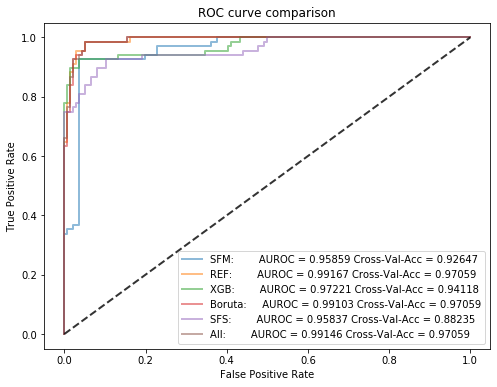

In [68]:
fig, ax = plt.subplots(figsize = (8,6)) 
cross_score = []
auroc_l = []
for col in list(sel_summary)[1:-1]:
    sel_feat_summary = sel_summary.Feature.loc[sel_summary[col] == 1].values
    cross_acc = cross_val_user(n_splits=4, shuffle = True, random_state=seed, clf = clf_lr, X_train = X_train_nor[sel_feat_summary], y_train = y_train )
    auroc = ROC_curve_plot_multi(n_splits=4, 
                        random_state=seed, 
                        shuffle=True, 
                        clf = clf_lr, 
                        X_train = X_train_nor[sel_feat_summary], 
                        y_train = y_train, 
                        clf_name = col,
                        acc = cross_acc
                       )
    auroc_l.append(auroc)
ax.plot([0, 1], [0, 1], ls='--', lw=2, color='k', alpha=.8)
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.title("ROC curve comparison")
plt.legend(loc="lower right",fontsize=10)
plt.show()

In [ ]:
cross_score = []
for col in list(sel_summary)[1:-1]:
    sel_feat_summary = sel_summary.Feature.loc[sel_summary[col] == 1].values
    score = cross_val_user(n_splits=4, shuffle = True, random_state=seed, clf = clf_lr, X_train = X_train_nor[sel_feat_summary], y_train = y_train )
    cross_score.append(score)

methode = list(sel_summary)[1:-1]
score_df = pd.DataFrame({'methode': methode,'score':cross_score}).sort_values(by = 'score',ascending=False).reset_index(drop = True)
score_df

## Classification

In [69]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)

In [70]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.plot(X[:, 0][y==2], X[:, 1][y==2], "ro")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

In [71]:
# X_train_reduce = X_train_nor[['Isoll','Fs2']]
# X_train_reduce = X_train_nor

In [72]:
# pca = PCA(n_components =2)
# X_train_reduce = pca.fit_transform(X_train_nor)
# X_train_reduce.shape

In [73]:
# import seaborn as sns

# sns.pairplot(X_train_reduce_df, hue="zustand")

In [74]:
# X_train_nor_reduce = X_train_nor[['Isoll','Fs2']]

In [75]:
# plot_dataset(X_train_reduce, y_train, [-1.5, 2.5, -1, 1.2])

### SVM 

In [76]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold,KFold
seed = 42

In [77]:
pca = PCA(n_components =0.90)
X_train_reduce = pca.fit_transform(X_train_nor)
X_train_reduce.shape

(68, 3)

In [78]:
C_values = np.logspace(-10,10,21)
C_values

array([1.e-10, 1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03,
       1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06, 1.e+07, 1.e+08, 1.e+09, 1.e+10])

In [79]:
C_values = C_values

param_grid = {"kernel": ["rbf",'poly','linear'], "C": C_values,'gamma':C_values, "random_state": [seed]}
skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state = seed)
gridSearch = GridSearchCV(SVC(probability=True), 
                          param_grid, 
                          cv=skfolds, 
                          scoring = 'accuracy', 
                          return_train_score=True)

gridSearch = gridSearch.fit(X_train_reduce, y_train)

results = pd.DataFrame(gridSearch.cv_results_)

# Ausgabe Optimale Hyperparameter
print('Bestes Ergebnis Validierung: ' + str("%.5f" % gridSearch.best_score_))
print('Optimale Hyperparamter:')
print(gridSearch.best_params_) 

Bestes Ergebnis Validierung: 1.00000
Optimale Hyperparamter:
{'C': 10.0, 'gamma': 1e-10, 'kernel': 'linear', 'random_state': 42}


In [80]:
results.sort_values(by = 'mean_test_score',ascending=False).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,param_random_state,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
1322,0.000669,4.730044e-04,0.000331,0.000468,1e+10,1e+10,linear,42,"{'C': 10000000000.0, 'gamma': 10000000000.0, '...",1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,0.0
1034,0.000000,0.000000e+00,0.000000,0.000000,1e+06,0.01,linear,42,"{'C': 1000000.0, 'gamma': 0.01, 'kernel': 'lin...",1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,0.0
779,0.000998,7.867412e-07,0.000332,0.000470,100,0.001,linear,42,"{'C': 100.0, 'gamma': 0.001, 'kernel': 'linear...",1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,0.0
1037,0.000874,8.646140e-04,0.000000,0.000000,1e+06,0.1,linear,42,"{'C': 1000000.0, 'gamma': 0.1, 'kernel': 'line...",1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,0.0
776,0.000866,1.560192e-04,0.000183,0.000259,100,0.0001,linear,42,"{'C': 100.0, 'gamma': 0.0001, 'kernel': 'linea...",1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,0.0


In [81]:
best_model = gridSearch.best_estimator_ 
best_model.fit(X_train_reduce, y_train)

SVC(C=10.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1e-10, kernel='linear',
    max_iter=-1, probability=True, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [82]:
# y_test = y_test.loc[y_test!=-1]

In [83]:
X_test_reduce = pca.transform(X_test_nor)
X_test_reduce

array([[-0.41596845, -0.20393563, -0.0340801 ],
       [-0.38827172, -0.21119541, -0.02822912],
       [-0.35584768, -0.24218086, -0.05510471],
       [-0.42431695, -0.26125358, -0.03752904],
       [ 0.03100061, -0.13792891, -0.1293329 ],
       [-0.04798854, -0.07005633, -0.11235682],
       [-0.04216743, -0.08179776, -0.07836694],
       [-0.05167063, -0.08172848, -0.07507939],
       [ 0.33455002,  0.13958389, -0.18255307],
       [ 0.30050283,  0.09736405, -0.18165576],
       [ 0.36241607,  0.12862397, -0.19757599],
       [ 0.33635125,  0.1542313 , -0.18564559],
       [ 0.67188241,  0.18617766, -0.16409461],
       [ 0.66934656,  0.18675217, -0.18378711],
       [ 0.63080966,  0.20877378, -0.19014576],
       [ 0.65260475,  0.19099063, -0.2015445 ],
       [ 0.97048792,  0.25950868, -0.21644115],
       [ 1.00879371,  0.2988445 , -0.20882359],
       [ 1.01173694,  0.30539824, -0.20993929],
       [ 1.02786083,  0.32327739, -0.21631468],
       [ 1.84678659,  0.75964082,  0.182

In [84]:
y_pred = best_model.predict(X_test_reduce)
accuracy_score(y_test, y_pred)

0.8928571428571429

In [85]:
from sklearn.metrics import confusion_matrix
import itertools

In [86]:
y_pred,y_test.values

(array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
        2, 2, 2, 2, 2, 2], dtype=int64),
 array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
        2, 2, 2, 2, 2, 2], dtype=int64))

[0 1 2]
Saving figture svm_pca_konfusion_


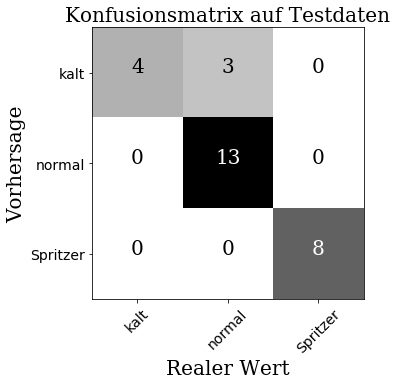

In [87]:
# Erzeuge Matrix
matrix = confusion_matrix(y_pred,y_test)

labels = np.unique(y_test)
print(labels)
labels = ['kalt','normal','Spritzer']
plt.figure(figsize=(8, 5))
plt.imshow(matrix, interpolation="nearest", cmap=plt.cm.gray_r)

plt.title("Konfusionsmatrix auf Testdaten",fontdict = font)
plt.ylabel("Vorhersage",fontdict=font)
plt.xlabel("Realer Wert",fontdict=font)

tick_marks = np.arange(len(labels))

plt.xticks(tick_marks, labels, rotation=45,fontsize = 14)
plt.yticks(tick_marks, labels,fontsize = 14)
fmt = "d"
thresh = matrix.max() / 2.0

for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
    plt.text(
        j,
        i,
        format(matrix[i, j], fmt),
        horizontalalignment="center",
        color="white" if matrix[i, j] > thresh else "black", 
        fontdict = font
    )
save_fig(image_path='C:/DA/Code/pywt/images/MDK2', fig_name='svm_pca_konfusion_',reselution=200)    
plt.show()

In [88]:
y_test.values, y_pred

(array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
        2, 2, 2, 2, 2, 2], dtype=int64),
 array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
        2, 2, 2, 2, 2, 2], dtype=int64))

In [89]:
diff = []
for idx,val in enumerate(y_test.values):
    if val != y_pred[idx]:
        diff.append(idx)
print(diff)

[5, 6, 7]


In [90]:
X_[diff]

NameError: name 'X_' is not defined

Saving figture svm_pca_3D


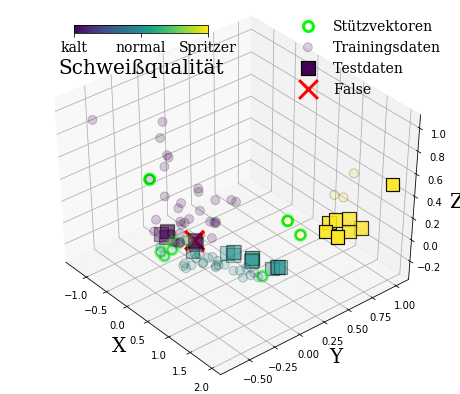

In [91]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes# noqa: F401 unused import
fig = plt.figure(figsize=(8,7))
font = {'family': 'serif',
        'size': 20
        }
prop={'family': 'serif', 'size':14}

X, Y, Z = X_train_reduce[:, 0], X_train_reduce[:, 1], X_train_reduce[:, 2]
X_, Y_, Z_ = X_test_reduce[:, 0], X_test_reduce[:, 1], X_test_reduce[:, 2]
XV,YV,ZV = best_model.support_vectors_[:,0], best_model.support_vectors_[:,1], best_model.support_vectors_[:,2]

ax = fig.add_subplot( projection='3d')
g = ax.scatter(XV, YV, ZV,s=100, marker='o',edgecolors='lime', lw = 3,facecolor = 'white',label = 'Stützvektoren')
k = ax.scatter(X, Y, Z, c=y_train, marker='o',cmap=plt.cm.viridis, s=80, edgecolors='k',label = 'Trainingsdaten',alpha = 0.2 )
f = ax.scatter(X_,Y_, Z_, c=y_pred, marker='s',cmap=plt.cm.viridis, s=190, edgecolors='k',lw = 1.2,label = 'Testdaten' )
F = ax.scatter(X_[diff],Y_[diff], Z_[diff], marker='x',color = 'r', s=350, lw = 3,label = 'False' )
# f = ax.scatter(X_,Y_, Z_, c=y_pred, marker='s',cmap=plt.cm.viridis, s=120, edgecolors='k',lw = 1,label = 'Testdaten' )
axins = inset_axes(ax,
                   width="30%",  # width = 5% of parent_bbox width
                   height="2%",  # height : 50%
                   loc='upper left',
                   bbox_to_anchor=(0.15, -0.05, 1, 1),
                   bbox_transform=ax.transAxes,
                   borderpad=0,
                   )
ax.set_xlabel('X',fontdict = font)
ax.set_ylabel('Y', fontdict = font)
ax.set_zlabel('Z', fontdict = font)
cbar = fig.colorbar(f, cax=axins,orientation="horizontal")
cbar.set_ticks([0,1,2])
cbar.ax.set_xticklabels(['kalt', 'normal', 'Spritzer'],fontdict = {'family': 'serif','size': 14})
cbar.set_label('Schweißqualität', fontdict = font)
ax.legend(frameon=False,ncol=1, prop = prop)
ax.view_init(40, -40)
save_fig(image_path='C:/DA/Code/pywt/images/MDK2', fig_name='svm_pca_3D',reselution=200)
plt.show()

In [ ]:
# poly_kernel_svm_clf = Pipeline([
#         ("svm_clf", SVC(kernel="rbf", degree= 3,probability = True,C = 5))
#     ])
# poly_kernel_svm_clf.fit(X_train_reduce, y_train)

In [ ]:
# fig, axes = plt.subplots(figsize=(6, 4), sharey=True)

# plt.sca(axes)
# plot_predictions(best_model,[-1.5, 2.5, -1, 1.2])
# plot_dataset(X_test_reduced, y_test, [-1.5, 2.5, -1, 1.2])

### LQV 

In [92]:
from LVQClassifier import LVQClassifier as LVQ

In [93]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in
    
    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional
    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.
    
    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional 
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [94]:
X_train_nor = X_train_nor.values
y_train = y_train.values
X_test_nor = X_test_nor.values
y_test = y_test.values

In [95]:
X_train_nor[i,:].shape

(16,)

In [96]:
pca = PCA(n_components =d)
X_train_reduce = pca.fit_transform(X_train_nor)
X_train_reduce.shape

(68, 3)

In [97]:
X_test_reduce = pca.transform(X_test_nor)
X_test_reduce.shape
seed = 42

In [98]:
# clf_lvq = LVQ(random_state=seed,epochs=5).fit(X_train_nor, y_train)
clf_lvq = LVQ(decrease_rate=0.9)
font = {'family': 'serif',
        'size': 20
        }
prop={'family': 'serif', 'size':12}

rf_params = {
    'n_components': [3,4,5],
    'alpha': [0.01,0.1,0.2,0.5],
    'epochs': [1,2,3,5,10,20,50],
    "random_state": [seed],
    'LVQ2':[False,True]}
# setting verbose = 10 will print the progress for every 
gridSearch = GridSearchCV(clf_lvq, 
                          rf_params, 
                          cv=skfolds, 
                          scoring = 'accuracy',
                          verbose=1,
                          return_train_score=True)

gridSearch.fit(X_train_reduce, y_train)
print('Bestes Ergebnis Validierung: ' + str("%.5f" % gridSearch.best_score_))
print ('Best Parameters: ', gridSearch.best_params_)
print ("Accuracy - Train : ", accuracy_score(gridSearch.best_estimator_.predict(X_train_reduce), y_train))
print ("Accuracy - Test : ", accuracy_score(gridSearch.best_estimator_.predict(X_test_reduce), y_test))

Fitting 3 folds for each of 168 candidates, totalling 504 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Bestes Ergebnis Validierung: 1.00000
Best Parameters:  {'LVQ2': False, 'alpha': 0.1, 'epochs': 1, 'n_components': 4, 'random_state': 42}
Accuracy - Train :  1.0
Accuracy - Test :  1.0


[Parallel(n_jobs=1)]: Done 504 out of 504 | elapsed:   11.6s finished


In [99]:
best_model = gridSearch.best_estimator_ 

In [100]:
y_pred,y_test

(array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
        2, 2, 2, 2, 2, 2], dtype=int64),
 array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
        2, 2, 2, 2, 2, 2], dtype=int64))

In [103]:
# save_fig(image_path='C:/DA/Code/pywt/images/MDK2', fig_name='pca',reselution=200)

[0 1 2]


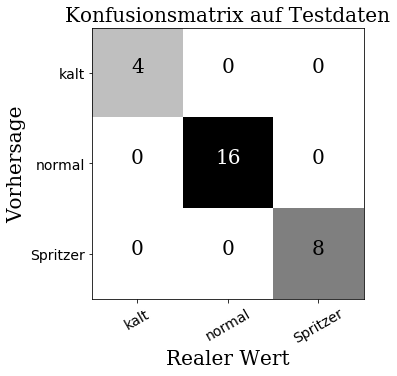

In [102]:
# Erzeuge Matrix
y_pred = best_model.predict(X_test_reduce)
matrix = confusion_matrix(y_test, y_pred)

labels = np.unique(y_test)
print(labels)
labels = ['kalt','normal','Spritzer']
plt.figure(figsize=(8, 5))
plt.imshow(matrix, interpolation="nearest", cmap=plt.cm.gray_r)

plt.title("Konfusionsmatrix auf Testdaten",fontdict = font)
plt.ylabel("Vorhersage",fontdict=font)
plt.xlabel("Realer Wert",fontdict=font)

tick_marks = np.arange(len(labels))

plt.xticks(tick_marks, labels, rotation=30,fontsize = 14)
plt.yticks(tick_marks, labels,fontsize = 14)
fmt = "d"
thresh = matrix.max() / 2.0

for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
    plt.text(
        j,
        i,
        format(matrix[i, j], fmt),
        horizontalalignment="center",
        color="white" if matrix[i, j] > thresh else "black",  
    fontdict=font
    )
    
# save_fig(image_path='C:/DA/Code/pywt/images/MDK2', fig_name='lvq_pca_konfusion_',reselution=200)    
plt.show()

In [104]:
X_LVQ = best_model.weights
X_LVQ

array([[-0.65759993,  0.10460008,  0.03371094],
       [ 0.97072145, -0.06128927, -0.13501263],
       [ 1.86282732,  0.73392637,  0.38447127],
       [-0.5556233 ,  0.19303271, -0.20366894],
       [ 0.54090408, -0.45589818, -0.21995156],
       [ 1.42566309,  0.42194457,  0.50083849],
       [-1.02295858, -0.1500039 ,  0.35362122],
       [ 0.2912054 , -0.17347509, -0.14016569],
       [ 1.45287094,  0.59451286,  0.27697188],
       [-0.45784798, -0.12944878, -0.08877942],
       [ 0.24843388,  0.15546845, -0.12009762],
       [ 1.34090278,  0.74302856,  0.25340311]])

In [105]:
y_LVQ = best_model.label_weights 
y_LVQ

array([0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2], dtype=int64)

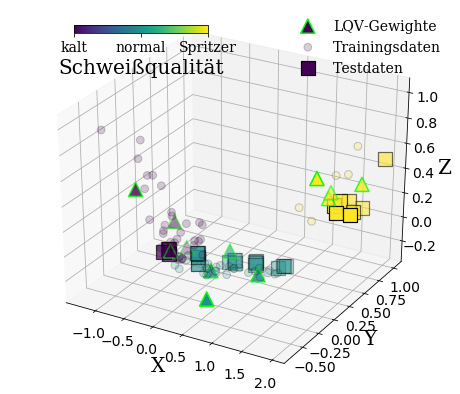

In [106]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes# noqa: F401 unused import
fig = plt.figure(figsize=(8,7))

font = {'family': 'serif',
        'size': 20
        }
prop={'family': 'serif', 'size':14}

X, Y, Z = X_train_reduce[:, 0], X_train_reduce[:, 1], X_train_reduce[:, 2]
X_, Y_, Z_ = X_test_reduce[:, 0], X_test_reduce[:, 1], X_test_reduce[:, 2]
XV,YV,ZV = X_LVQ[:, 0], X_LVQ[:, 1], X_LVQ[:, 2]

ax = fig.add_subplot( projection='3d')
g = ax.scatter(XV, YV, ZV,c=y_LVQ,cmap=plt.cm.viridis, s=200, marker='^', edgecolors='lime',label = 'LQV-Gewighte',linewidth=1.5)

k = ax.scatter(X, Y, Z, c=y_train, marker='o',cmap=plt.cm.viridis, s=60, edgecolors='k',label = 'Trainingsdaten',alpha = 0.2 )
f = ax.scatter(X_,Y_, Z_, c=y_pred, marker='s',cmap=plt.cm.viridis, s=200, edgecolors='k',lw = 1,label = 'Testdaten',linewidth=1.2 )
axins = inset_axes(ax,
                   width="30%",  # width = 5% of parent_bbox width
                   height="2%",  # height : 50%
                   loc='upper left',
                   bbox_to_anchor=(0.15, -0.05, 1, 1),
                   bbox_transform=ax.transAxes,
                   borderpad=0,
                   )
ax.set_xlabel('X',fontdict = font)
ax.set_ylabel('Y', fontdict = font)
ax.set_zlabel('Z', fontdict = font)
ax.tick_params(axis='both', which='major', labelsize=14, direction='in')
cbar = fig.colorbar(f, cax=axins,orientation="horizontal")
cbar.set_ticks([0,1,2])
cbar.ax.set_xticklabels(['kalt', 'normal', 'Spritzer'],fontdict = {'family': 'serif','size': 14})
cbar.set_label('Schweißqualität', fontdict = font)
ax.legend(frameon=False,ncol=1, prop = prop)
# save_fig(image_path='C:/DA/Code/pywt/images/MDK2', fig_name='lvq_pca_3D',reselution=200) 
plt.show()

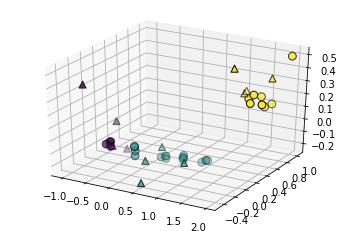

In [107]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
fig = plt.figure()

X, Y, Z = X_test_reduce[:, 0], X_test_reduce[:, 1], X_test_reduce[:, 2]
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_LVQ[:, 0], X_LVQ[:, 1], X_LVQ[:,2],c=y_LVQ,
           cmap=plt.cm.viridis, s=50, marker='^', edgecolors='k', label = 'LVQ Weights')
ax.scatter(X, Y, Z,c=y_test, cmap=plt.cm.viridis, s=60, edgecolors='k',label = 'Testdaten')

plt.show()

### Tree

In [137]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
from graphviz import Source

In [138]:
X_train_copy = X_train.drop(columns=['ETp','dR'])
X_train_copy = X_train_copy[rf_sfm_feature]

KeyError: "None of [Index(['$Q_{ges}$', '$I_{soll}$', '$P_{max}$', '$\\dot Q$', '$Q_{30}$',\n       '$R_{-10}$', '$\\rho$'],\n      dtype='object')] are in the [columns]"

In [ ]:
X_test_copy = X_test.drop(columns=['ETp','dR'])
X_test_copy.head()
X_test_copy = X_test_copy[rf_sfm_feature]

In [ ]:
from sklearn import tree
decision_tree = tree.DecisionTreeClassifier(random_state = seed,criterion = 'gini')
# decision_tree = decision_tree.fit(X_train_copy, y_train)
decision_tree = decision_tree.fit(X_train_nor, y_train)
decision_tree.get_params()

In [113]:
# X_train.iloc[:,15]

In [114]:
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2,
       2, 2], dtype=int64)

In [115]:
from graphviz import Source
from sklearn.tree import export_graphviz
import matplotlib.image as mpimg
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox

In [116]:
X_train_reduce

array([[-9.70299080e-01,  5.61744866e-02,  3.93860982e-01],
       [-1.28037535e+00,  1.02303184e-01,  4.75179424e-01],
       [-1.24904620e+00,  1.17553222e-01,  6.21775581e-01],
       [-1.12283373e+00,  1.01784226e-01,  3.57800866e-01],
       [-9.96091437e-01,  1.66713860e-02,  4.36877239e-02],
       [-1.15576612e+00,  8.62829847e-02,  2.50936239e-01],
       [-1.02380219e+00,  3.71309278e-01, -6.98046487e-02],
       [-1.02897020e+00,  3.70115079e-01, -3.90867736e-02],
       [-9.37714737e-01, -6.61458239e-01,  1.01767335e+00],
       [-8.50904407e-01,  1.20230073e-01, -2.50180204e-02],
       [-8.42106421e-01,  6.82845291e-01, -2.48881802e-01],
       [-8.33240759e-01,  6.29933577e-01, -2.06366981e-01],
       [-9.11821450e-01,  4.95338472e-01, -1.71167308e-01],
       [-8.36113631e-01,  8.54898452e-02, -5.51825151e-02],
       [-7.48154448e-01,  2.67058843e-01, -1.33559595e-01],
       [-6.28269518e-01,  2.51641471e-02, -1.31169258e-01],
       [-5.03710383e-01, -1.23260929e-01

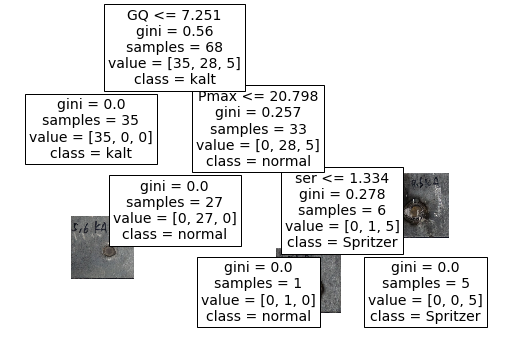

In [117]:
# # Grafische Ausgabe des Modells
names = np.array(['kalt', 'normal','Spritzer'])
# feature_names = np.array(['X', 'Y', 'Z'])
# dot_data = StringIO()
# export_graphviz(decision_tree,
#                 out_file = dot_data, 
#                 feature_names = feature_names, 
#                 filled = True, 
#                 rounded = True, 
#                 special_characters = True, 
#                 class_names = names)

# # Draw graph
# graph = pydotplus.graph_from_dot_data(dot_data)  

# # Show graph
# Image(graph.create_png())
fig, ax = plt.subplots(figsize=(9,6))
tree.plot_tree(decision_tree, 
#                filled=True,
               rounded=False,
               fontsize = 14,
               class_names = names, 
               feature_names = list(X_train_copy),
#                impurity  = True,
               ax = ax,
               rotate = False
              )
img_kalt = mpimg.imread('kalt.PNG')
img_normal = mpimg.imread('normal.PNG')
img_sp = mpimg.imread('Spritzer.PNG')

imagebox = OffsetImage(img_kalt, zoom=0.28)
ab = AnnotationBbox(imagebox, (0.19, 0.26),frameon= False)
ax.add_artist(ab)

imagebox = OffsetImage(img_normal, zoom=0.3)
ab = AnnotationBbox(imagebox, (0.6, 0.16),frameon= False)
ax.add_artist(ab)

imagebox = OffsetImage(img_sp, zoom=0.3)
ab = AnnotationBbox(imagebox, (0.81, 0.39),frameon= False)
ax.add_artist(ab)

# save_fig(image_path='C:/DA/Code/pywt/images/MDK2', fig_name='Tree',reselution=200) 
plt.show()

In [118]:
y_pred = decision_tree.predict(X_test_copy)
# y_pred = decision_tree.predict(X_test_nor)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int64)

[0 1 2]


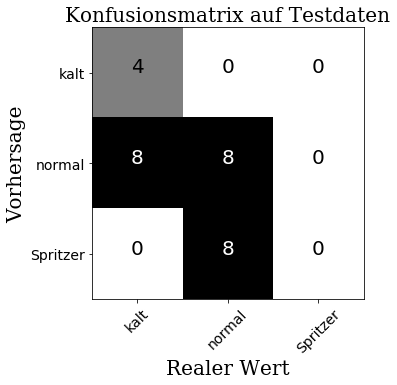

In [119]:
# Erzeuge Matrix
matrix = confusion_matrix(y_test, y_pred)

labels = np.unique(y_test)
print(labels)
labels = ['kalt','normal','Spritzer']
plt.figure(figsize=(8, 5))
plt.imshow(matrix, interpolation="nearest", cmap=plt.cm.gray_r)

plt.title("Konfusionsmatrix auf Testdaten",fontdict = font)
plt.ylabel("Vorhersage",fontdict=font)
plt.xlabel("Realer Wert",fontdict=font)

tick_marks = np.arange(len(labels))

plt.xticks(tick_marks, labels, rotation=45,fontsize = 14)
plt.yticks(tick_marks, labels,fontsize = 14)
fmt = "d"
thresh = matrix.max() / 2.0

for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
    plt.text(
        j,
        i,
        format(matrix[i, j], fmt),
        horizontalalignment="center",
        color="white" if matrix[i, j] > thresh else "black", 
        fontsize = 20
    )
# save_fig(image_path='C:/DA/Code/pywt/images/MDK2', fig_name='Tree_pca',reselution=200)
plt.show()

### RandomForestClassifier

In [139]:
X_train_copy = X_train.drop(columns=['ETS','dR'])
X_test_copy = X_test.drop(columns = ['ETS','dR'])

In [140]:
X_train_copy.head()

,ETp,Fs1,Fs2,GQ,Isoll,MET,Pmax,Pv,Qdot,Qsgf,R10,R90,dF,dP,dt,ser
0,0.073387,0.154129,0.075483,2.720133,2.4,0.000000,4.681193,10.645738,4.476117,94.432759,0.413018,0.393677,0.050813,0.133604,-0.002571,3.116076
1,0.073895,0.110103,0.104606,1.905907,2.4,0.010410,3.484450,6.741629,3.077494,68.284660,0.526645,0.514445,0.037737,0.077731,-0.008812,4.072566
2,0.083594,0.131834,0.000000,1.949830,2.4,0.008554,3.491667,10.546488,3.150776,69.494672,0.542085,0.532778,0.043794,0.079415,-0.008420,4.229175
3,0.156631,0.179335,0.235265,2.520299,2.8,0.058569,4.319718,4.703543,4.091928,85.871210,0.480062,0.465328,0.051923,0.110910,-0.006891,3.770987
4,0.137734,0.157835,0.000000,2.992015,2.8,0.026961,5.072886,0.462330,4.889595,101.613909,0.377671,0.363658,0.063358,0.156392,-0.004470,2.931205


In [141]:
X_train_copy.columns = ['$e_{pe}$','$S_{1}$','$S_{2}$','$Q_{ges}$','$I_{soll}$','$\Delta e_{max}$','$P_{max}$','$P_{v}$','$\dot Q$','$Q_{30}$'
,'$R_{10}$','$R_{-10}$','$\Delta F$','$\Delta P$','$\Delta t$',r'$\rho$']

In [142]:
X_train_copy.head()

,$e_{pe}$,$S_{1}$,$S_{2}$,$Q_{ges}$,$I_{soll}$,$\Delta e_{max}$,$P_{max}$,$P_{v}$,$\dot Q$,$Q_{30}$,$R_{10}$,$R_{-10}$,$\Delta F$,$\Delta P$,$\Delta t$,$\rho$
0,0.073387,0.154129,0.075483,2.720133,2.4,0.000000,4.681193,10.645738,4.476117,94.432759,0.413018,0.393677,0.050813,0.133604,-0.002571,3.116076
1,0.073895,0.110103,0.104606,1.905907,2.4,0.010410,3.484450,6.741629,3.077494,68.284660,0.526645,0.514445,0.037737,0.077731,-0.008812,4.072566
2,0.083594,0.131834,0.000000,1.949830,2.4,0.008554,3.491667,10.546488,3.150776,69.494672,0.542085,0.532778,0.043794,0.079415,-0.008420,4.229175
3,0.156631,0.179335,0.235265,2.520299,2.8,0.058569,4.319718,4.703543,4.091928,85.871210,0.480062,0.465328,0.051923,0.110910,-0.006891,3.770987
4,0.137734,0.157835,0.000000,2.992015,2.8,0.026961,5.072886,0.462330,4.889595,101.613909,0.377671,0.363658,0.063358,0.156392,-0.004470,2.931205


In [143]:
X_test_copy.columns = ['$e_{pe}$','$S_{1}$','$S_{2}$','$Q_{ges}$','$I_{soll}$','$\Delta e_{max}$','$P_{max}$','$P_{v}$','$\dot Q$','$Q_{30}$'
,'$R_{10}$','$R_{-10}$','$\Delta F$','$\Delta P$','$\Delta t$',r'$\rho$']

In [144]:
X_test_copy.head()

,$e_{pe}$,$S_{1}$,$S_{2}$,$Q_{ges}$,$I_{soll}$,$\Delta e_{max}$,$P_{max}$,$P_{v}$,$\dot Q$,$Q_{30}$,$R_{10}$,$R_{-10}$,$\Delta F$,$\Delta P$,$\Delta t$,$\rho$
1,0.089259,0.695394,0.000000,4.447366,5.6,0.089259,7.580432,1.790828,7.261108,150.144917,0.214027,0.225204,0.250516,0.423334,-0.004638,1.790502
2,0.063439,0.904660,0.064131,4.464405,5.6,0.069128,7.584841,1.959340,7.290742,151.081286,0.215472,0.226579,0.262795,0.386460,-0.004562,1.788470
3,0.060928,0.656045,0.000000,4.858555,5.6,0.083307,8.266251,2.314415,7.939454,163.387384,0.201772,0.209596,0.250183,0.485518,-0.004218,1.653259
4,0.011757,0.829069,0.101731,4.498752,5.6,0.021864,7.687782,1.917697,7.316015,152.834650,0.213922,0.228852,0.255809,0.366702,-0.005852,1.780753
5,0.050934,1.036175,0.310056,6.239543,6.4,0.090308,11.043151,4.191288,10.450534,200.493695,0.180714,0.184563,0.289570,1.522988,0.003459,1.451759


In [145]:
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.model_selection import KFold
# Building the RandomForestClassifier model
from sklearn.ensemble import RandomForestClassifier

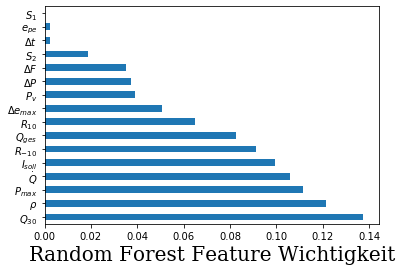

In [146]:
font = {'family': 'serif',
        'size': 20
        }
prop={'family': 'serif', 'size':14}


clf_rf = RandomForestClassifier(n_estimators=100, random_state=seed, n_jobs=-1)
clf_rf.fit(X_train_copy, y_train)

feat_importances = pd.Series(clf_rf.feature_importances_, index=X_train_copy.columns)
ax = feat_importances.nlargest(17).plot(kind='barh')
ax.set_xlabel('Random Forest Feature Wichtigkeit', fontdict = font )
ax.set_xlabel('Random Forest Feature Wichtigkeit', fontdict = font )
plt.show()

In [147]:
std = np.std([clf_rf.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)
std

array([3.90312782e-18, 0.00000000e+00, 3.81639165e-17, 5.55111512e-17,
       1.80411242e-16, 6.93889390e-18, 2.63677968e-16, 7.63278329e-17,
       9.71445147e-17, 1.38777878e-16, 1.38777878e-17, 1.38777878e-17,
       0.00000000e+00, 9.71445147e-17, 2.16840434e-18, 1.24900090e-16])

In [148]:
rf_sfm = SelectFromModel(clf_rf)

# Train the selector
rf_sfm = rf_sfm.fit(X_train_copy, y_train)
X_important_train = rf_sfm.transform(X_train_copy)

In [149]:
rf_sfm_feature = X_train_copy.columns.values[rf_sfm.get_support()]
X_important_train = X_train_copy[rf_sfm_feature]
X_important_test = X_test_copy[rf_sfm_feature]

In [150]:
X_important_train.head()

,$Q_{ges}$,$I_{soll}$,$P_{max}$,$\dot Q$,$Q_{30}$,$R_{10}$,$R_{-10}$,$\rho$
0,2.720133,2.4,4.681193,4.476117,94.432759,0.413018,0.393677,3.116076
1,1.905907,2.4,3.484450,3.077494,68.284660,0.526645,0.514445,4.072566
2,1.949830,2.4,3.491667,3.150776,69.494672,0.542085,0.532778,4.229175
3,2.520299,2.8,4.319718,4.091928,85.871210,0.480062,0.465328,3.770987
4,2.992015,2.8,5.072886,4.889595,101.613909,0.377671,0.363658,2.931205


In [151]:
X_important_test.head()

,$Q_{ges}$,$I_{soll}$,$P_{max}$,$\dot Q$,$Q_{30}$,$R_{10}$,$R_{-10}$,$\rho$
1,4.447366,5.6,7.580432,7.261108,150.144917,0.214027,0.225204,1.790502
2,4.464405,5.6,7.584841,7.290742,151.081286,0.215472,0.226579,1.788470
3,4.858555,5.6,8.266251,7.939454,163.387384,0.201772,0.209596,1.653259
4,4.498752,5.6,7.687782,7.316015,152.834650,0.213922,0.228852,1.780753
5,6.239543,6.4,11.043151,10.450534,200.493695,0.180714,0.184563,1.451759


In [152]:
clf_rf.fit(X_important_train, y_train)
rf_pred = clf_rf.predict(X_important_test)

[0 1 2]


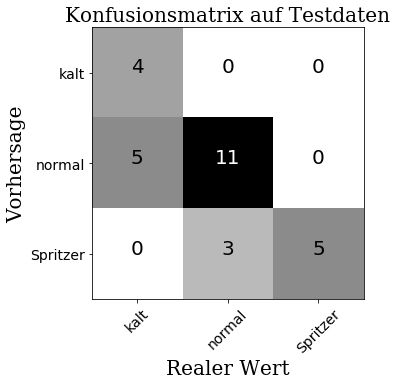

In [153]:
# Erzeuge Matrix
matrix = confusion_matrix(y_test, rf_pred)

labels = np.unique(y_test)
print(labels)
labels = ['kalt','normal','Spritzer']
plt.figure(figsize=(8, 5))
plt.imshow(matrix, interpolation="nearest", cmap=plt.cm.gray_r)

plt.title("Konfusionsmatrix auf Testdaten",fontdict = font)
plt.ylabel("Vorhersage",fontdict=font)
plt.xlabel("Realer Wert",fontdict=font)

tick_marks = np.arange(len(labels))

plt.xticks(tick_marks, labels, rotation=45,fontsize = 14)
plt.yticks(tick_marks, labels,fontsize = 14)
fmt = "d"
thresh = matrix.max() / 2.0

for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
    plt.text(
        j,
        i,
        format(matrix[i, j], fmt),
        horizontalalignment="center",
        color="white" if matrix[i, j] > thresh else "black", 
        fontsize = 20
    )
plt.show()

In [135]:
d = np.arange(1,51)
add = np.array([100,200,500,1000])
n_trees = np.append(d,add)
n_trees

array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
         12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
         23,   24,   25,   26,   27,   28,   29,   30,   31,   32,   33,
         34,   35,   36,   37,   38,   39,   40,   41,   42,   43,   44,
         45,   46,   47,   48,   49,   50,  100,  200,  500, 1000])

In [136]:
# n_trees = [1,2,5,6,7,8,9,10,20,50,100,200,500,1000]
# n_trees = [1,2,5,6,7,8,9,10,20,50,100,200,500,1000]
genauigkeit = []
n_feat_dic = {}
for n in n_trees:
    n_feat_dic.setdefault(n,[])


for n in n_trees:
    clf_rf = RandomForestClassifier(n_estimators=n, random_state=seed, n_jobs=-1,max_depth = 10)
    clf_rf.fit(X_train_copy, y_train)
    rf_sfm = SelectFromModel(clf_rf)

    # Train the selector
    rf_sfm = rf_sfm.fit(X_train_copy, y_train)
    X_important_train = rf_sfm.transform(X_train_copy)
    rf_sfm_feature = X_train_copy.columns.values[rf_sfm.get_support()]
    X_important_train = X_train_copy[rf_sfm_feature]
    X_important_test = X_test_copy[rf_sfm_feature]
    clf_rf.fit(X_important_train, y_train)
    rf_pred = clf_rf.predict(X_important_test)
    accuracy = accuracy_score(rf_pred, y_test)
    print(accuracy)
    n_feat_dic[n].append(list(rf_sfm_feature))
    genauigkeit.append(accuracy)

0.6428571428571429
0.42857142857142855
0.42857142857142855
0.42857142857142855
0.75
1.0
0.75
0.7857142857142857
0.8571428571428571
0.8571428571428571
0.6785714285714286
0.8571428571428571
0.6428571428571429
0.8571428571428571
0.8571428571428571
0.8571428571428571
0.8571428571428571
0.8214285714285714
0.6785714285714286
0.6428571428571429
0.6785714285714286
0.6428571428571429
0.6785714285714286
0.6785714285714286
0.75
0.8214285714285714
0.8214285714285714
0.75
0.75
0.75
0.75
0.6785714285714286
0.75
0.7142857142857143
0.7142857142857143
0.7142857142857143
0.7142857142857143
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.7142857142857143
0.7142857142857143
0.7142857142857143
0.7142857142857143
0.75
0.7142857142857143


In [154]:
n_feat_dic

{1: [['$I_{soll}$', '$\\Delta e_{max}$']],
 2: [['$\\Delta e_{max}$', '$R_{10}$', '$\\Delta F$']],
 3: [['$\\Delta e_{max}$', '$\\dot Q$', '$R_{10}$', '$\\Delta F$']],
 4: [['$\\Delta e_{max}$', '$\\dot Q$', '$R_{10}$', '$\\Delta F$']],
 5: [['$\\Delta e_{max}$', '$\\dot Q$', '$R_{10}$', '$\\Delta P$', '$\\rho$']],
 6: [['$\\Delta e_{max}$',
   '$P_{v}$',
   '$\\dot Q$',
   '$R_{10}$',
   '$\\Delta P$',
   '$\\rho$']],
 7: [['$\\Delta e_{max}$', '$\\dot Q$', '$R_{10}$', '$\\Delta P$', '$\\rho$']],
 8: [['$\\Delta e_{max}$',
   '$P_{v}$',
   '$\\dot Q$',
   '$R_{10}$',
   '$\\Delta P$',
   '$\\rho$']],
 9: [['$I_{soll}$',
   '$\\Delta e_{max}$',
   '$P_{v}$',
   '$\\dot Q$',
   '$R_{10}$',
   '$\\Delta F$',
   '$\\Delta P$',
   '$\\rho$']],
 10: [['$I_{soll}$',
   '$\\Delta e_{max}$',
   '$P_{v}$',
   '$\\dot Q$',
   '$R_{10}$',
   '$\\Delta P$',
   '$\\rho$']],
 11: [['$I_{soll}$',
   '$\\Delta e_{max}$',
   '$P_{v}$',
   '$\\dot Q$',
   '$Q_{30}$',
   '$R_{10}$',
   '$\\Delta F$',
   

<function matplotlib.pyplot.show(*args, **kw)>

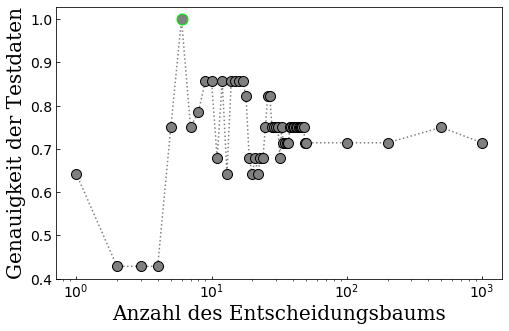

In [155]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(n_trees, genauigkeit,'o:',markersize = 10, mec = 'k',color = 'gray')
ax.plot(n_trees[np.argmax(genauigkeit)], max(genauigkeit),'o:',markersize = 11, mec = 'lime',color = 'gray', lw = 3)
ax.set_xlabel('Anzahl des Entscheidungsbaums',fontdict = font,)
ax.set_ylabel('Genauigkeit der Testdaten',fontdict = font)
ax.tick_params(axis='both', which='major', labelsize=14, direction='in')
ax.set_xscale('log')
# save_fig(image_path='C:/DA/Code/pywt/images/MDK2', fig_name='randomforst_anzahl',reselution=200)
plt.show

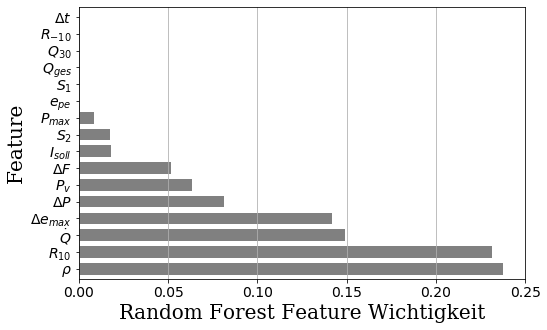

In [156]:
beat_clf_rf = RandomForestClassifier(n_estimators=6, random_state=seed, n_jobs=-1)
beat_clf_rf.fit(X_train_copy, y_train)
fig, ax = plt.subplots(figsize=(8,5))
feat_importances = pd.Series(beat_clf_rf.feature_importances_, index=X_train_copy.columns)
ax = feat_importances.nlargest(17).plot(kind='barh',color = 'gray',width = 0.7)
ax.set_xlabel('Random Forest Feature Wichtigkeit', fontdict = font )
ax.set_ylabel('Feature', fontdict = font )
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_xticks(np.arange(0,0.3,0.05))
ax.set_xlim(0,0.25)
ax.grid(axis = 'x')
# save_fig(image_path='C:/DA/Code/pywt/images/MDK2', fig_name='feature_wichtigkeit',reselution=200)

plt.show()

In [157]:
rf_sfm = SelectFromModel(beat_clf_rf)

# Train the selector
rf_sfm = rf_sfm.fit(X_train_copy, y_train)
X_important_train = rf_sfm.transform(X_train_copy)
rf_sfm_feature = X_train_copy.columns.values[rf_sfm.get_support()]

In [158]:
rf_sfm_feature

array(['$\\Delta e_{max}$', '$P_{v}$', '$\\dot Q$', '$R_{10}$',
       '$\\Delta P$', '$\\rho$'], dtype=object)

In [159]:
X_important_train = X_train_copy[rf_sfm_feature]
X_important_test = X_test_copy[rf_sfm_feature]

In [160]:
beat_clf_rf.fit(X_important_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=6, n_jobs=-1,
                       oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

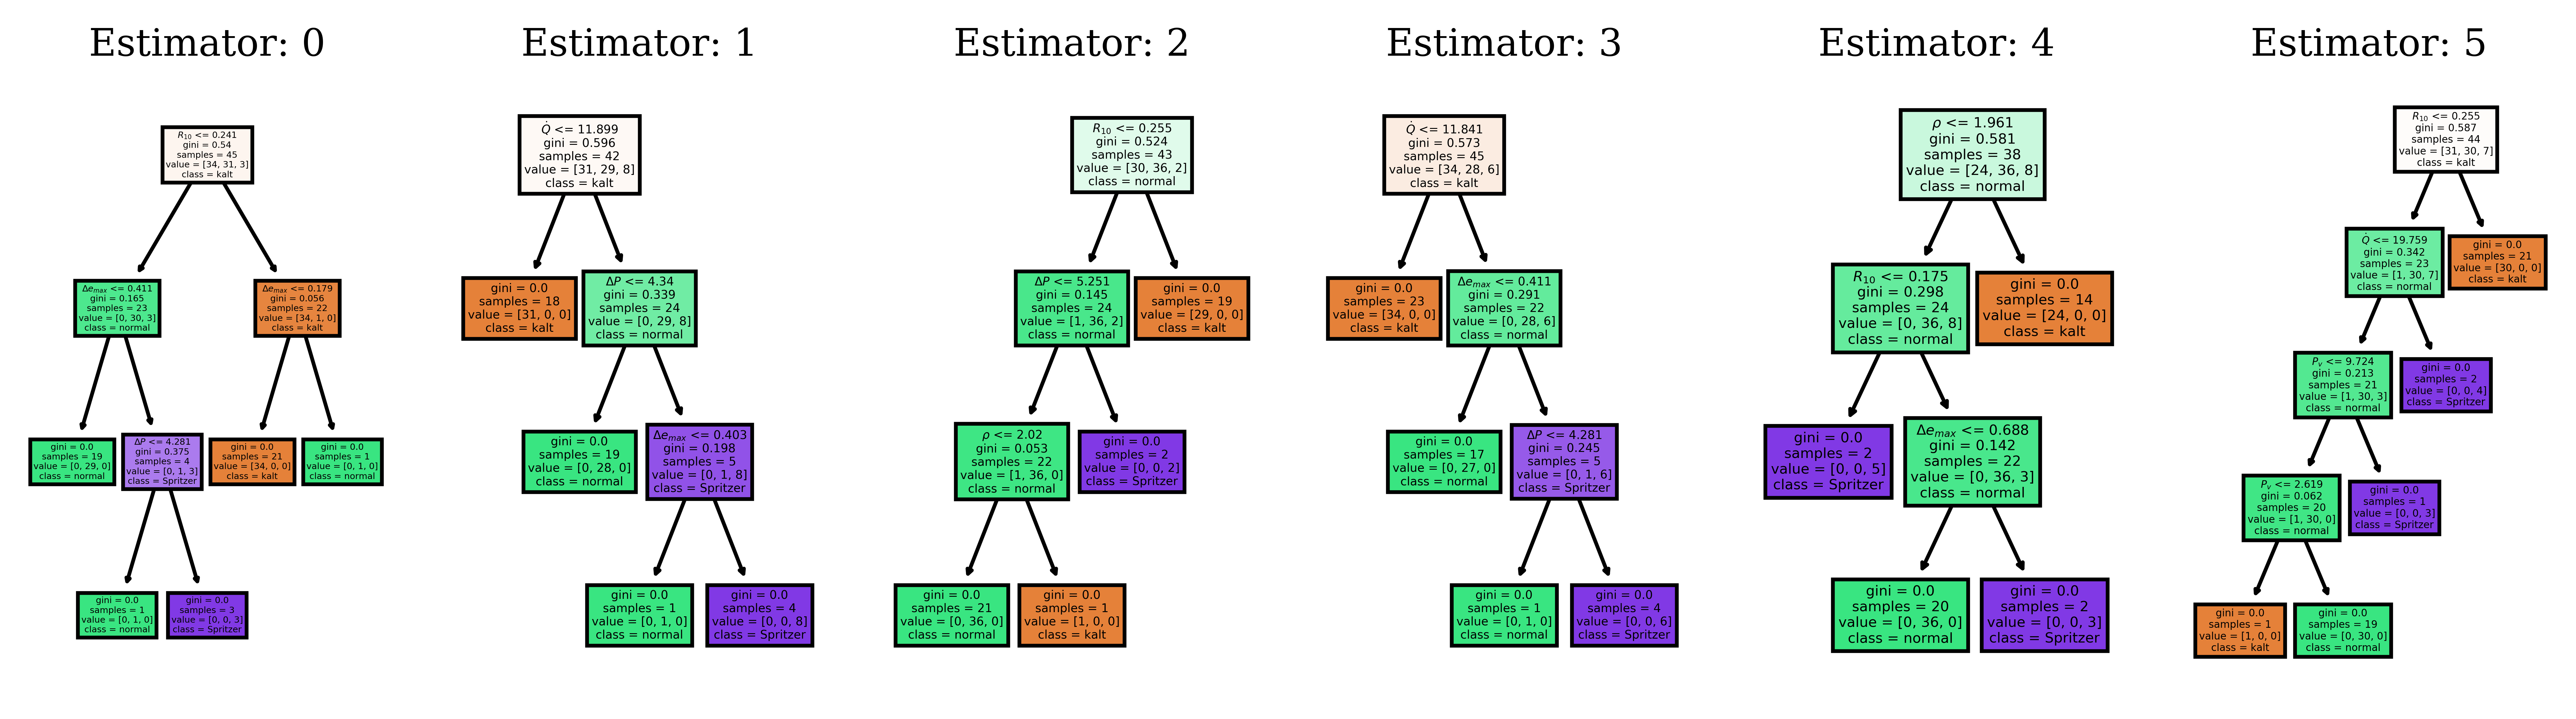

In [161]:
font = {'family': 'serif',
        'size': 10
        }
prop={'family': 'serif', 'size':14}
fig, axes = plt.subplots(nrows = 1,ncols = 6,figsize = (12,3), dpi=900)
for index in range(0, 6):
    tree.plot_tree(beat_clf_rf.estimators_[index],
                   feature_names = X_important_train.columns, 
                   class_names=['kalt','normal','Spritzer'],
                   filled = True,
#                    fontsize = 2,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index),fontdict = font)
# save_fig(image_path='C:/DA/Code/pywt/images/MDK2', fig_name='feature_wichtigkeit',reselution=200)
# fig.savefig('rf_trees.png')

In [162]:
tree.plot_tree(decision_tree, 
#                filled=True,
               rounded=False,
               fontsize = 14,
               class_names = names, 
               feature_names = list(X_train_copy),
#                impurity  = True,
               ax = ax,
               rotate = False
              )

[Text(148.79999999999998, 237.82500000000002, '$e_{pe}$ <= 7.251\ngini = 0.56\nsamples = 68\nvalue = [35, 28, 5]\nclass = kalt'),
 Text(74.39999999999999, 169.875, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]\nclass = kalt'),
 Text(223.2, 169.875, '$S_{2}$ <= 20.798\ngini = 0.257\nsamples = 33\nvalue = [0, 28, 5]\nclass = normal'),
 Text(148.79999999999998, 101.92500000000001, 'gini = 0.0\nsamples = 27\nvalue = [0, 27, 0]\nclass = normal'),
 Text(297.59999999999997, 101.92500000000001, '$P_{v}$ <= 1.334\ngini = 0.278\nsamples = 6\nvalue = [0, 1, 5]\nclass = Spritzer'),
 Text(223.2, 33.974999999999994, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = normal'),
 Text(371.99999999999994, 33.974999999999994, 'gini = 0.0\nsamples = 5\nvalue = [0, 0, 5]\nclass = Spritzer')]

In [163]:
rf_pred = beat_clf_rf.predict(X_important_test)
accuracy = accuracy_score(rf_pred, y_test)

In [164]:
rf_pred

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2], dtype=int64)